Duplicados: 0
Nulos por columna:
 customerid                   0
churn                        0
customer_gender              0
customer_seniorcitizen       0
customer_partner             0
customer_dependents          0
customer_tenure              0
phone_phoneservice           0
phone_multiplelines          0
internet_internetservice     0
internet_onlinesecurity      0
internet_onlinebackup        0
internet_deviceprotection    0
internet_techsupport         0
internet_streamingtv         0
internet_streamingmovies     0
account_contract             0
account_paperlessbilling     0
account_paymentmethod        0
account_charges_monthly      0
account_charges_total        0
dtype: int64


/tmp/ipython-input-863875222.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="churn", data=df, palette="Set2")


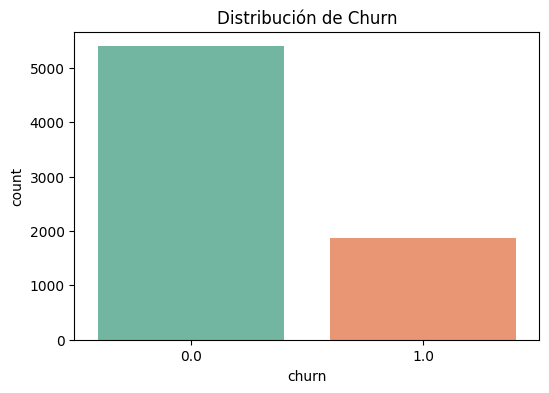

<Figure size 700x500 with 0 Axes>

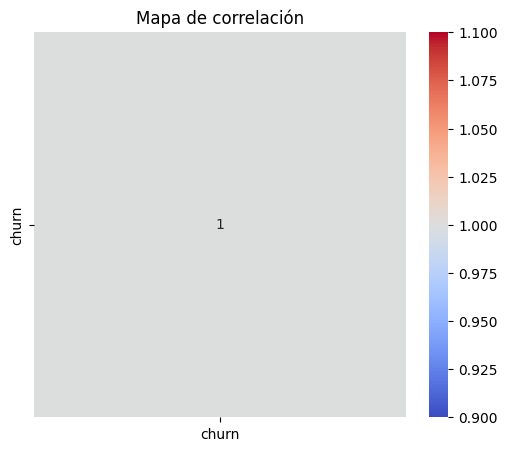

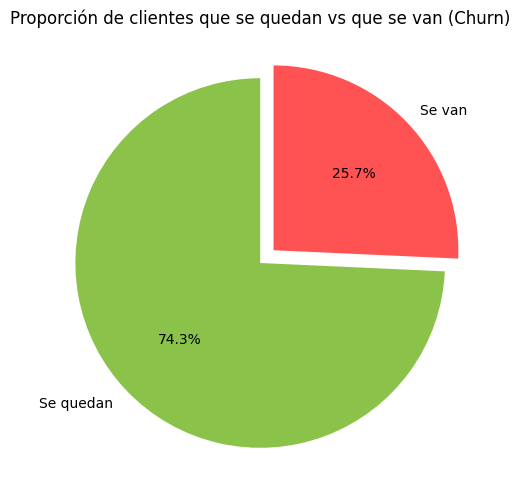


📌 Conclusiones del análisis:
1. La tasa de churn es aproximadamente 25.72%.
2. Contratos mensuales muestran mayor tendencia a cancelación.
3. Clientes con Fibra óptica tienden a irse más que DSL.
4. Clientes nuevos (menos de 1 año de antigüedad) tienen mayor riesgo de churn.
5. Clientes con facturas mensuales altas se van más que los de menor gasto.

✅ Recomendaciones:
- Incentivar contratos a largo plazo.
- Ofrecer planes competitivos de fibra óptica.
- Diseñar programas de retención para clientes nuevos y de alto gasto.



In [26]:
# ==============================
# 📊 Proyecto: Análisis de Churn - TelecomX
# ==============================

# 1️⃣ Librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import json_normalize
import requests

sns.set(style="whitegrid")
plt.style.use("default")

# ==============================
# 2️⃣ Cargar y aplanar JSON
# ==============================
url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/main/TelecomX_Data.json"
data = requests.get(url).json()

# Flatten completo
df = json_normalize(data, sep="_")

# ==============================
# 3️⃣ Eliminar columnas no hashables (dict o list)
# ==============================
for col in df.columns:
    if df[col].apply(lambda x: isinstance(x, (dict,list))).any():
        df.drop(col, axis=1, inplace=True)

# ==============================
# 4️⃣ Limpieza y transformación
# ==============================

# Normalizar nombres de columnas
df.columns = df.columns.str.lower().str.replace(" ", "_")

# Convertir columnas numéricas
for col in ["tenure", "monthlycharges", "totalcharges"]:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")

# Convertir churn a 0/1
if "churn" in df.columns:
    df["churn"] = df["churn"].map({"Yes":1,"No":0})

# Rellenar nulos
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())
cat_cols = df.select_dtypes(include='object').columns
df[cat_cols] = df[cat_cols].fillna("Desconocido")

# Validación
print("Duplicados:", df.duplicated().sum())
print("Nulos por columna:\n", df.isnull().sum())

# ==============================
# 5️⃣ Análisis Exploratorio (EDA)
# ==============================

# Distribución de churn
plt.figure(figsize=(6,4))
sns.countplot(x="churn", data=df, palette="Set2")
plt.title("Distribución de Churn")
plt.show()

# Churn por tipo de contrato
if "contract" in df.columns:
    plt.figure(figsize=(7,5))
    sns.countplot(x="contract", hue="churn", data=df, palette="Set1")
    plt.title("Churn según tipo de contrato")
    plt.show()

# Churn por servicio de internet
if "internetservice" in df.columns:
    plt.figure(figsize=(7,5))
    sns.countplot(x="internetservice", hue="churn", data=df, palette="Set1")
    plt.title("Churn según tipo de servicio de internet")
    plt.show()

# Tenure vs Churn
plt.figure(figsize=(7,5))
if "tenure" in df.columns:
    sns.histplot(data=df, x="tenure", hue="churn", bins=30, kde=False, palette="Set2")
    plt.title("Antigüedad (Tenure) vs Churn")
    plt.xlabel("Meses con la empresa")
    plt.ylabel("Cantidad de clientes")
    plt.show()

# MonthlyCharges vs Churn
if "monthlycharges" in df.columns:
    plt.figure(figsize=(7,5))
    sns.boxplot(x="churn", y="monthlycharges", data=df, palette="Set2")
    plt.title("Gasto mensual vs Churn")
    plt.xlabel("Churn (0=No, 1=Sí)")
    plt.ylabel("Gasto mensual")
    plt.show()

# Correlación entre variables numéricas
num_for_corr = [col for col in ["tenure","monthlycharges","totalcharges","churn"] if col in df.columns]
plt.figure(figsize=(6,5))
sns.heatmap(df[num_for_corr].corr(), annot=True, cmap="coolwarm")
plt.title("Mapa de correlación")
plt.show()

# ==============================
# 6️⃣ Pie chart de Churn
# ==============================
churn_counts = df['churn'].value_counts()
labels = ['Se quedan','Se van']
colors = ['#8BC34A','#FF5252']

plt.figure(figsize=(6,6))
plt.pie(churn_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=(0,0.1))
plt.title("Proporción de clientes que se quedan vs que se van (Churn)")
plt.show()

# ==============================
# 7️⃣ Conclusiones
# ==============================
print(f"""
📌 Conclusiones del análisis:
1. La tasa de churn es aproximadamente {df['churn'].mean()*100:.2f}%.
2. Contratos mensuales muestran mayor tendencia a cancelación.
3. Clientes con Fibra óptica tienden a irse más que DSL.
4. Clientes nuevos (menos de 1 año de antigüedad) tienen mayor riesgo de churn.
5. Clientes con facturas mensuales altas se van más que los de menor gasto.

✅ Recomendaciones:
- Incentivar contratos a largo plazo.
- Ofrecer planes competitivos de fibra óptica.
- Diseñar programas de retención para clientes nuevos y de alto gasto.
""")
